Problem 3: Glauber Dynamics

Show that a Monte Carlo process with energy H(x) for state x and a transition probability
$$W(x|x') = \frac{1}{2}[1-tanh(\frac{\beta}{2}(\mathcal{H}(x)-\mathcal{H}(x')))]$$

satisfies detailed balance. Here, \beta = 1/ $k_B$ T

Problem 5: Monte Carlo Simulation of One-Dimensional Ising Mode

The one-dimensional Ising model consists of N spins arranged periodically on a line. Each spin
can take the values $s_i$∈ {−1, +1}. The energy $\mathcal{H}$ in the absence of a magnetic field is given by

$$\mathcal{H} = -J \sum_{i=1}^N s_i s_{i+1}$$

To avoid boundary effects, periodic boundary conditions are employed, such that $s_{N+1} = s_1$.

Write a Monte Carlo program to simulate this system with the “importance sampling” technique and the Metropolis algorithm.

(a) Start with an ordered configuration, si = +1 for i = 1, ..., N.

Steps:

1.Define a function to create an initial configuration: initial_configuration(N)

2.Define a function to caculate the magnetization with a certain configuration: magnetization_config(config)

3.Define a function to implement the Metropolis algorithm.

a) create an initial configuration config1 ${s_i}$

b) choose a random spin $s_i$ and flip it, and config2.

c) create a random number $\alpha$ between 0 and 1.

d) calculte the energy difference between config1 and config2(be careful with the PBC),$\delta E = 2J(s_is_{i+1}+s_{i-1}s_i)$. If $\delta E$ < 0 , accept config2, if $\delta E$ >0 and $exp(-\beta \delta E) >\alpha$,accept config2, otherwise, accept config1. Return to the step b) until M steps

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def initial_configuration(N):
    return np.ones(N)

def magnetization_config(config):
    return np.sum(config)

def Metroplis(steps,N,betaJ):
    config1 = initial_configuration(N)
    M_t = []
    for i in range(steps):
        index_flip = np.random.randint(0,N)
        config2 = config1.copy()
        config2[index_flip] = -config2[index_flip]
        alpha = np.random.random()
        
        beta_delta_E = betaJ*2*(config1[index_flip]*config1[(index_flip+1)%N]+config1[(index_flip-1)%N]*config1[index_flip])
        if beta_delta_E <= 0:
            config1=config2.copy()
        else:
            if np.exp(-beta_delta_E)>alpha:
                config1=config2.copy()
        M_t.append(magnetization_config(config1))
    return M_t

(b) Calculate the time-dependent magnetization $M(t) = \sum_{i=1}^N s_i$
for N = 50 and t ≤ 100
(Monte Carlo steps per spin), with kBT/J = 0.25 and 1.0.


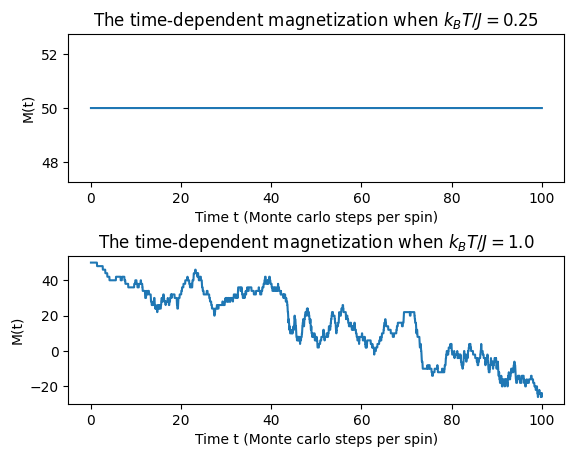

In [6]:
kbtj = np.array([0.25,1.0])
N=50
MCS = N/2
steps = int(MCS*100)
betaJ_list = 1/kbtj
fig, axs = plt.subplots(2)
t_space = np.linspace(0,100,steps)
for i in range(len(betaJ_list)):
    M_t = Metroplis(steps,N,betaJ_list[i])
    axs[i].plot(t_space,M_t)
    axs[i].set_title('The time-dependent magnetization when $k_B T/J = $'+str(kbtj[i]))
    axs[i].set_xlabel("Time t (Monte carlo steps per spin)")
    axs[i].set_ylabel("M(t)")
fig.subplots_adjust(hspace=0.5)

(c) Calculate the average magnetization $<M> = \frac{1}{t_{max}} \sum^{t_{max}}_t M(t)$ in thermal equilibrium for N = 50 and $k_BT/J = 0.1,0.25,0.5,0.75,1.0,1.5,2.0$

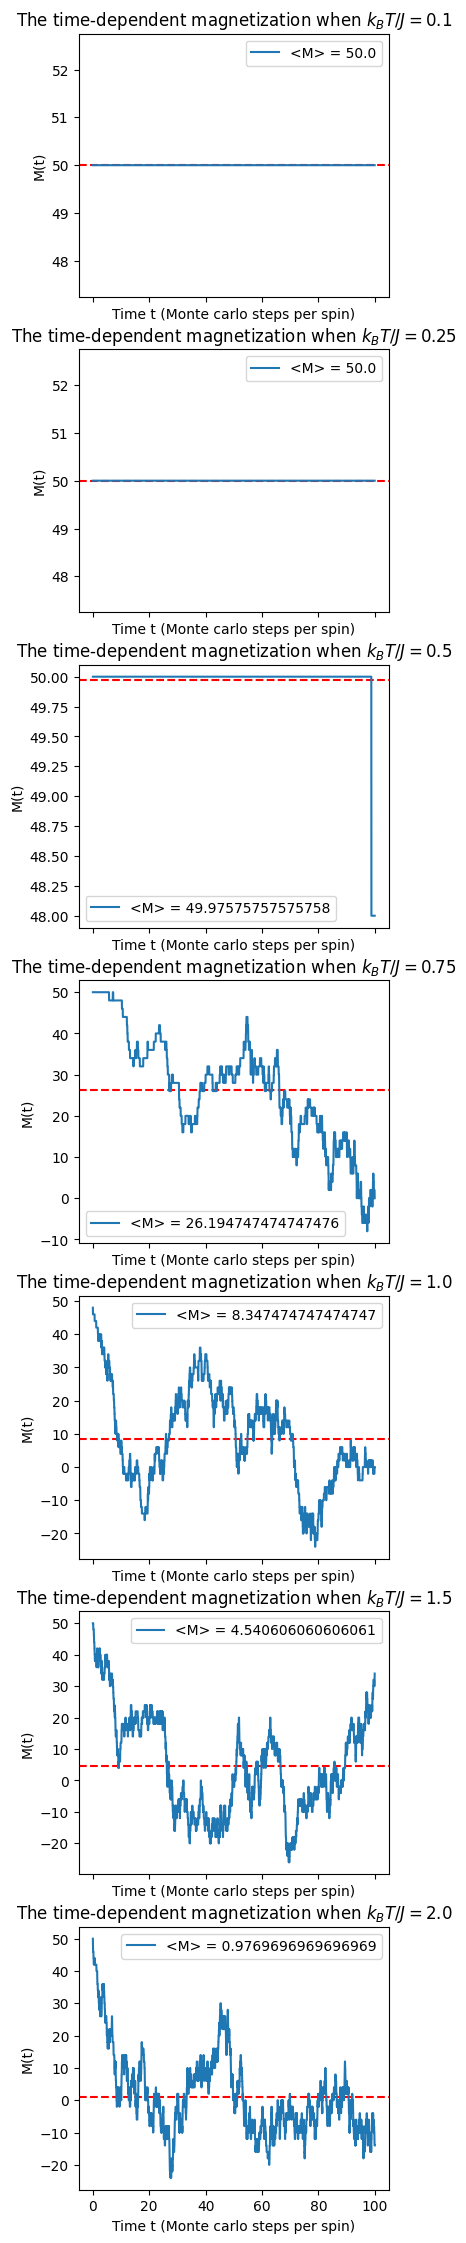

In [7]:
kbtj = np.array([0.1,0.25,0.5,0.75,1.0,1.5,2.0])
N=50
MCS = N/2
steps = int(MCS*100)
betaJ_list = 1/kbtj
fig, axs = plt.subplots(len(kbtj),figsize=(4,4*len(kbtj)),sharex=True)
aver_M_list = []
for i in range(len(betaJ_list)):
    M_t = Metroplis(steps,N,betaJ_list[i])
    aver_M = np.mean(M_t[int(N/2):]) #average magnetization
    aver_M_list.append(aver_M)
    axs[i].axhline(y=aver_M,color='r',linestyle='--')
    axs[i].plot(t_space,M_t,label='<M> = '+str(aver_M))
    axs[i].set_title('The time-dependent magnetization when $k_B T/J = $'+str(kbtj[i]))
    axs[i].set_xlabel("Time t (Monte carlo steps per spin)")
    axs[i].set_ylabel("M(t)")
    axs[i].legend()


(d) Plot the magnetization as function of the temperature $k_BT/J$.
Which behavior do you expect for large temperatures?

In [8]:
kbtj = np.linspace(0.1,2,200)
N=50
MCS = N/2
steps = int(MCS*1000)
betaJ_list = 1/kbtj
aver_M_list = []
for i in range(len(betaJ_list)):
    M_t = Metroplis(steps,N,betaJ_list[i])
    aver_M = np.mean(M_t[int(N/2):]) #average magnetization
    aver_M_list.append(aver_M)


Text(0, 0.5, '<M>')

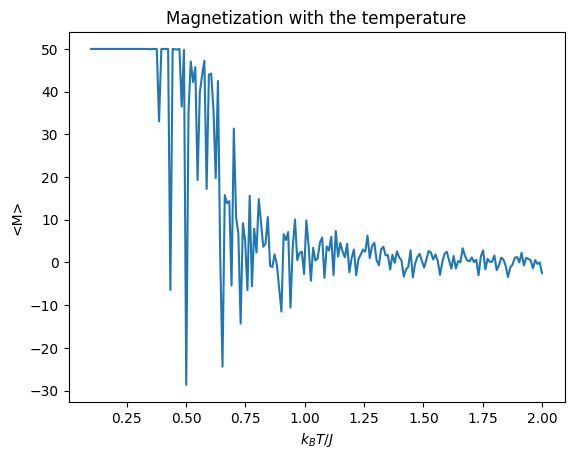

In [9]:
plt.plot(kbtj.tolist(),aver_M_list)
plt.title("Magnetization with the temperature")
plt.xlabel(r'$k_B T/J$')
plt.ylabel("<M>")